In [1]:
import keras

Using TensorFlow backend.


In [82]:
import os
import numpy as np
import pandas as pd
import PIL
import cv2
from PIL import Image
from IPython.display import Image 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from keras.applications import vgg16, inception_v3, resnet50, mobilenet, xception
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.applications.xception import preprocess_input, decode_predictions
from keras.models import Sequential

In [3]:
#Load the VGG model
xception_model = xception.Xception(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size = (299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = preprocess_input(x)

In [ ]:
preds = xception_model.predict(x)

In [ ]:
preds[0][386]

In [ ]:
from IPython.display import Image 
Image(filename = 'elephant.jpg')

In [ ]:
base_model = xception.Xception(weights='imagenet', include_top= False, pooling = 'avg')

In [ ]:
base_model.summary()

In [1]:
base_model.

SyntaxError: invalid syntax (<ipython-input-1-620d49185422>, line 1)

In [2]:
a =1 

## Task List
* Create Images
* Multiple class regression?

In [ ]:
base_model.layers

In [ ]:
xception_model.layers

In [ ]:
print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to thefrom keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
 
filename = 'images/cat.jpg'
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
 network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [ ]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
print label

# Start here

In [3]:
base_model = xception.Xception(weights='imagenet', include_top= False, pooling = 'avg')

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
for layer in base_model.layers:
    layer.trainable = False

In [5]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [105]:
dims = (458, 458, 3)
#dims = (499, 499, 3)
resized_default_dims = (299, 299, 3)

In [48]:
base_model

# Hyperparameters

In [106]:
d = 0.5
loss = 'mean_squared_error'
metrics = {'y1': ['accuracy', 'mse'], 'y2': ['accuracy', 'mse'], 'y3': ['accuracy', 'mse']}

In [125]:
model_input = keras.Input(shape = (dims))
x = base_model(model_input)
y1 = keras.layers.Dense(64, activation='relu')(x)
y1 = keras.layers.Dropout(d)(y1)
y1 = keras.layers.Dense(1, activation='relu')(y1)

y2 = keras.layers.Dense(64, activation='relu')(x)
y2 = keras.layers.Dropout(d)(y2)
y2 = keras.layers.Dense(1, activation='relu')(y2)

y3 = keras.layers.Dense(64, activation='relu')(x)
y3 = keras.layers.Dropout(d)(y3)
y3 = keras.layers.Dense(1, activation='relu')(y3)
    
model = keras.Model(inputs=model_input, outputs=[y1, y2, y3])

In [126]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 458, 458, 3)  0                                            
__________________________________________________________________________________________________
xception (Model)                (None, 2048)         20861480    input_11[0][0]                   
__________________________________________________________________________________________________
dense_55 (Dense)                (None, 64)           131136      xception[10][0]                  
__________________________________________________________________________________________________
dense_57 (Dense)                (None, 64)           131136      xception[10][0]                  
__________________________________________________________________________________________________
dense_59 (

In [127]:
model.compile(keras.optimizers.Adam(lr = 0.001), loss = loss_list, metrics = metrics)

In [53]:
train_df = pd.read_csv('../labels_no_duplicates.csv', encoding= 'latin-1')

In [54]:
valid_df = pd.read_csv('../labels_no_duplicates.csv', encoding= 'latin-1')

In [55]:
val_set = os.listdir('valid')

In [56]:
for i, r in train_df.iterrows():
    if (r.at['name'] in val_set):
        train_df = train_df.drop(i)

In [57]:
train_df = train_df.reset_index().drop(columns='index')

In [58]:
for i, r in valid_df.iterrows():
    if (r.at['name'] not in val_set):
        valid_df = valid_df.drop(i)
valid_df = valid_df.reset_index().drop(columns='index')

In [65]:
train_batches = ImageDataGenerator().flow_from_dataframe(dataframe =train_df, x_col = 'name', directory='train', y_col = ['small fish', 'big fish', 'dolphin'], target_size = (499, 499), class_mode = 'raw')
valid_batches = ImageDataGenerator().flow_from_dataframe(dataframe =valid_df, x_col = 'name', directory='valid',y_col = ['small fish', 'big fish', 'dolphin'], target_size = (499, 499), class_mode = 'raw')


Found 119 validated image filenames.
Found 24 validated image filenames.


#### No clue.... flow_from_dataframe doesn't seem to work right because of output dimension problems...

In [102]:
train_set=[]
valid_set=[]
for each in os.listdir('train'):
    train_set.append(img_to_array(load_img('train/'+each)))
for each in os.listdir('valid'):
    valid_set.append(img_to_array(load_img('valid/'+each)))
train_set = np.array(train_set)
valid_set = np.array(valid_set)

In [111]:
t_sf = np.array(train_df['small fish'].to_list())
t_bf = np.array(train_df['big fish'].to_list())
t_d = np.array(train_df['dolphin'].to_list())

v_sf = np.array(valid_df['small fish'].to_list())
v_bf = np.array(valid_df['big fish'].to_list())
v_d = np.array(valid_df['dolphin'].to_list())

train_ylabels = [t_sf, t_bf, t_d]
valid_ylabels = [v_sf, v_bf, v_d]

# Moment of Truth...

model.fit(x=train_set, y=train_ylabels, validation_data = (valid_set, valid_ylabels), epochs=50, batch_size=32, shuffle = True)

In [129]:
model.save('firstmodel.hdf5')

# Predict


In [130]:
os.listdir('Pics')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Pics'

In [149]:
model.predict(train_set[0]))

ValueError: Error when checking input: expected input_11 to have 4 dimensions, but got array with shape (458, 458, 3)

In [145]:
img_to_array(imageObject)

array([[[255., 255., 255., 255.],
        [255., 255., 255., 255.],
        [255., 255., 255., 255.],
        ...,
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.]],

       [[255., 255., 255., 255.],
        [255., 255., 255., 255.],
        [  0.,   0.,   0., 255.],
        ...,
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.]],

       [[255., 255., 255., 255.],
        [255., 255., 255., 255.],
        [  0.,   0.,   0., 255.],
        ...,
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.]],

       ...,

       [[255., 255., 255., 255.],
        [255., 255., 255., 255.],
        [  0.,   0.,   0., 255.],
        ...,
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.]],

       [[255., 255., 255., 255.],
        [255., 255., 255., 255.],
        [  0.,   0.,   0., 255.],
        .

In [ ]:
image = cv2.imread('cropped_pics/'+os.listdir('cropped_pics')[0])

In [231]:
image.shape

(458, 458, 3)

In [232]:
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        ...,
        [ 45,  96, 148],
        [ 34,  77, 120],
        [ 23,  58,  93]],

       [[255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        ...,
        [ 45,  96, 148],
        [ 34,  77, 120],
        [ 23,  58,  93]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        ...,
        [ 52, 105, 158],
        [ 52, 105, 158],
        [ 51, 104, 157]],

       [[255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        ...,
        [ 52, 105, 158],
        [ 52, 105, 158],
        [ 51, 104, 157]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

# # Resizing images

In [19]:
labels = pd.read_csv('../labels.csv', encoding = 'latin-1')

In [207]:
selection = '../Pics/'+os.listdir('../Pics')[0]

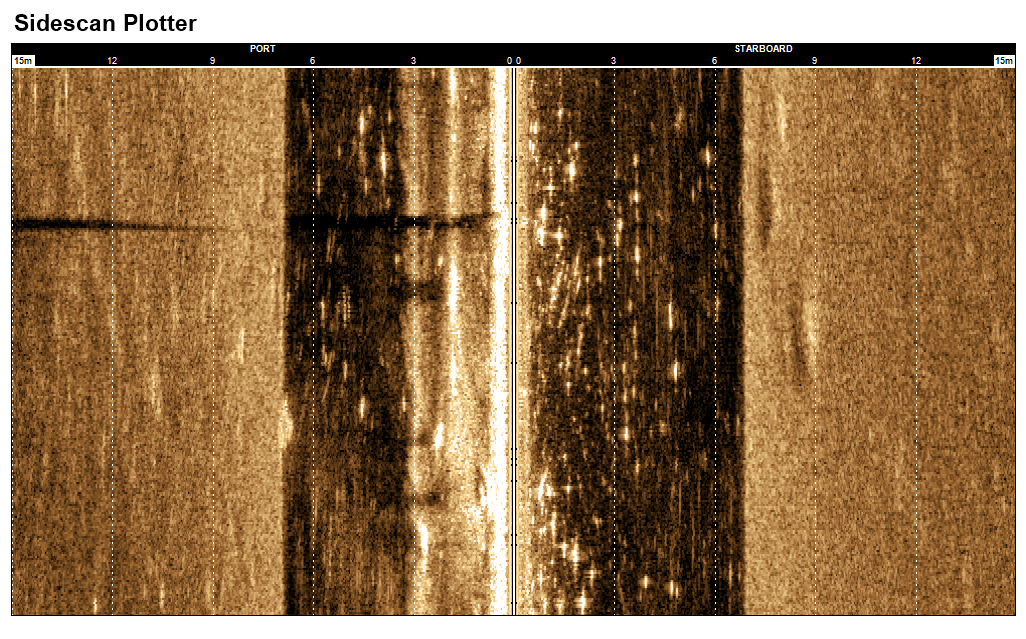

In [131]:
Image(filename = 'predict.png')

In [134]:
#Image(filename = 'predict.png')
#imageObject  = PIL.Image.open(selection)

In [135]:
imageObject  = PIL.Image.open('predict.png')

In [136]:
width, height = imageObject.size

In [137]:
left = width/2
upper = 67
right = (width/2) +height-23-67
lower = height-23

In [138]:
imageObject = imageObject.crop((left, upper, right, lower))

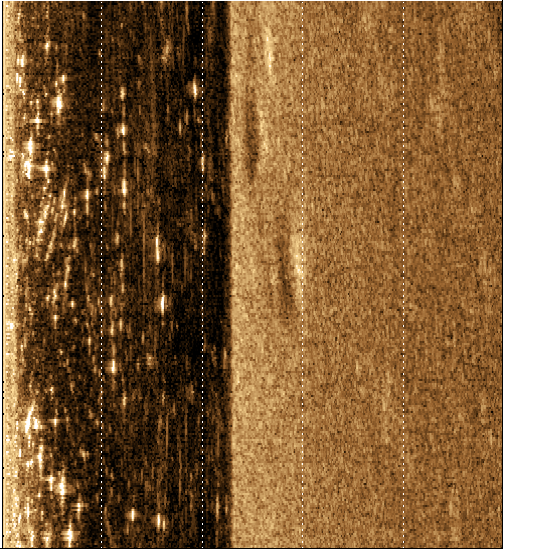

In [139]:
imageObject

In [140]:
imageObject.size

(549, 549)

In [141]:
imageObject.save('predict_cropped.png')

# programmatically for everything in confluence folder
## first find duplicates


In [156]:
duplicates = []

In [157]:
for each in labels['name']:
    if '_1.png' in each:
        print (each)
        duplicates.append(each)

Scanline20181107_161628_1.png
Scanline20181107_162416_1.png
Scanline20181107_163243_1.png
Scanline20181107_163853_1.png
Scanline20181107_164013_1.png


In [158]:
duplicates

['Scanline20181107_161628_1.png',
 'Scanline20181107_162416_1.png',
 'Scanline20181107_163243_1.png',
 'Scanline20181107_163853_1.png',
 'Scanline20181107_164013_1.png']

In [228]:
left = width/2
upper = 67
right = (width/2) +height-23-67 #so the result is a square image
lower = height-23

In [229]:
for each in labels['name']:
    if each not in duplicates:
        imageObject  = PIL.Image.open('../Pics/'+each)
        width, height = imageObject.size
        imageObject = imageObject.crop((left, upper, right, lower))
        imageObject.save(f'cropped_pics/{each}')

In [165]:
print (f'{selection}')

../Pics/Scanline20181107_152300.png


In [161]:
duplicates

['Scanline20181107_161628_1.png',
 'Scanline20181107_162416_1.png',
 'Scanline20181107_163243_1.png',
 'Scanline20181107_163853_1.png',
 'Scanline20181107_164013_1.png']